In [1]:
import numpy as np
import pandas as pd 
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('C:\\Users\\admin\\ML_Project\\TehranHouses_ML\\Houses.csv')

In [5]:
df.head(20)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
5,70,2,True,True,False,North Program Organization,2.050000e+09,68333.33
6,87,2,True,True,True,Pardis,6.000000e+08,20000.00
7,59,1,True,True,True,Shahran,2.150000e+09,71666.67
8,54,2,True,True,False,Andisheh,4.930000e+08,16433.33
9,71,1,True,True,True,West Ferdows Boulevard,2.370000e+09,79000.00


In [6]:
df.dtypes

Area           object
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Address        object
Price         float64
Price(USD)    float64
dtype: object

In [6]:
df.shape

(3479, 8)

In [8]:
df['Room'].value_counts()

Room
2    1961
3     732
1     673
4      70
5      33
0      10
Name: count, dtype: int64

In [4]:
df.describe()

,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


## The Area column refers to the meterage of the house, but it is string , So we change the type to float

Text(0, 0.5, 'Price')

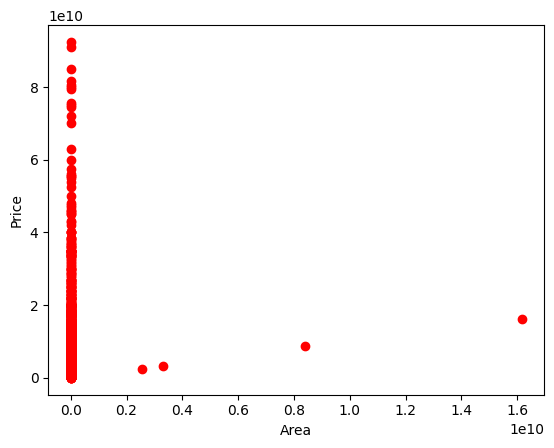

In [21]:
#df.Area=df.Area.str.replace(',','').str.strip().astype(float) # This line should b run just one time
df.describe()
#plt.scatter(df.Room,df.Price,color='b')
plt.scatter(df.Area,df.Price,color='r')
plt.xlabel('Area')
plt.ylabel('Price')

array([[<Axes: title={'center': 'Area'}>]], dtype=object)

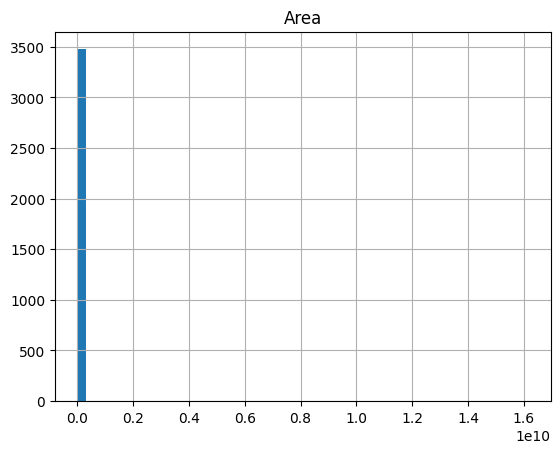

In [19]:
df.hist(column='Area',bins=50)

array([[<Axes: title={'center': 'Room'}>]], dtype=object)

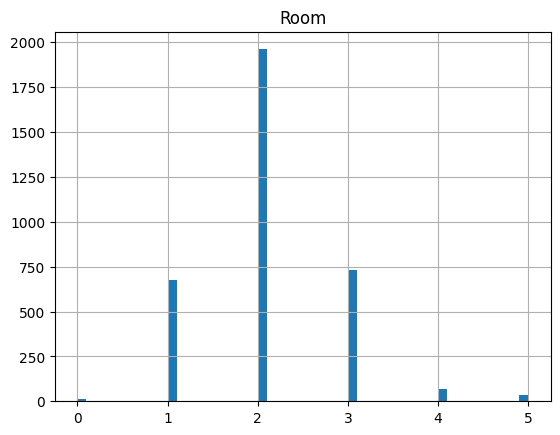

In [20]:
df.hist(column='Room',bins=50)

# Noise Reduction
- Replace Nan with 0
    - Ignoring 0 value in the Address attribute
- bad data recognition for Area
    - removing the area more than 3600

In [13]:
df=df.fillna('0')
df_new=df[((df['Area']<300) & (df['Address']!='0'))]
print(df_new)
cdf=df_new[['Area','Room','Parking','Warehouse','Elevator','Address','Price']]

       Area  Room  Parking  Warehouse  Elevator             Address  \
0      63.0     1     True       True      True             Shahran   
1      60.0     1     True       True      True             Shahran   
2      79.0     2     True       True      True              Pardis   
3      95.0     2     True       True      True       Shahrake Qods   
4     123.0     2     True       True      True      Shahrake Gharb   
...     ...   ...      ...        ...       ...                 ...   
3474   86.0     2     True       True      True  Southern Janatabad   
3475   83.0     2     True       True      True            Niavaran   
3476   75.0     2    False      False     False              Parand   
3477  105.0     2     True       True      True              Dorous   
3478   82.0     2    False       True      True              Parand   

             Price  Price(USD)  
0     1.850000e+09    61666.67  
1     1.850000e+09    61666.67  
2     5.500000e+08    18333.33  
3     9.025000e

Text(0, 0.5, 'Price')

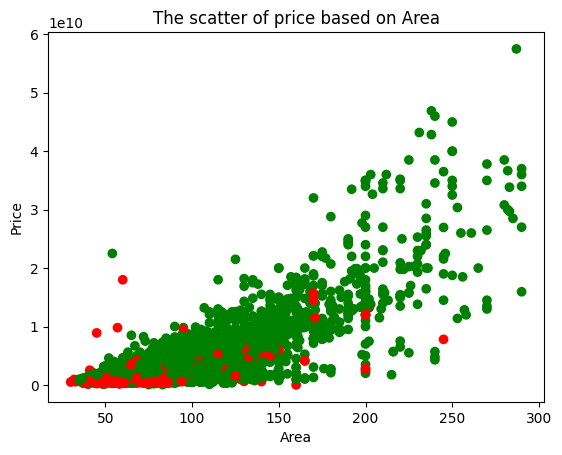

In [14]:
parking_color=np.where(cdf.Parking,'g','r')
plt.scatter(cdf.Area,cdf.Price,color=parking_color)
plt.title('The scatter of price based on Area')
plt.xlabel('Area')
plt.ylabel('Price')
###############

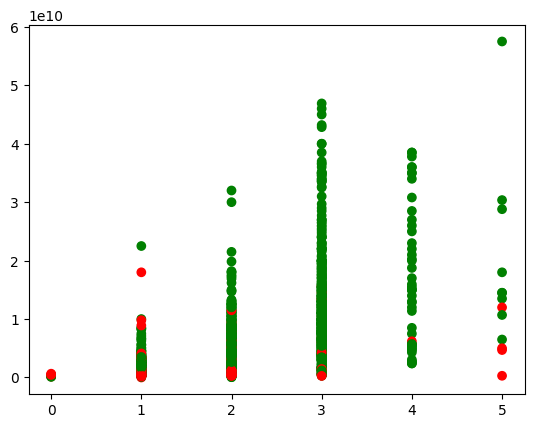

In [15]:
plt.scatter(cdf.Room,cdf.Price,color=parking_color)

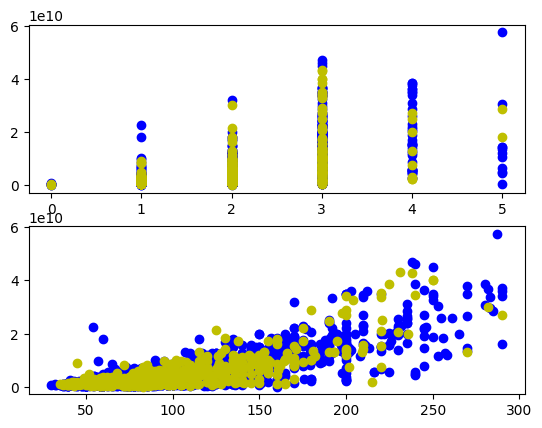

In [16]:
fig=plt.figure()
ax1=fig.add_subplot(211)
ax1.scatter(train.Room,train.Price,color='b')
ax1.scatter(test.Room,test.Price,color='y')

ax2=fig.add_subplot(212)
ax2.scatter(train.Area,train.Price,color='b')
ax2.scatter(test.Area,test.Price,color='y')

In [10]:
msk=np.random.rand(len(cdf))<0.8
train=cdf[msk]
test=cdf[~msk]

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x=np.column_stack((train.Room,train.Area))
train_y=np.asanyarray(train.Price)
test_x=np.column_stack((test.Room,test.Area))
test_y=np.asanyarray(test.Price)
#################
print(train_x[:3])
poly=PolynomialFeatures(degree=3)
train_x_poly=poly.fit_transform(train_x)
print(train_x_poly)
###########################
clf=linear_model.LinearRegression()
train_y_=clf.fit(train_x_poly,train_y)
#The coefficient is :
print(f'The coefficient is :{train_y_.coef_}')
print(f'The intercept is: {train_y_.intercept_}')

[[ 1. 63.]
 [ 1. 60.]
 [ 2. 79.]]
[[1.00000e+00 1.00000e+00 6.30000e+01 ... 6.30000e+01 3.96900e+03
  2.50047e+05]
 [1.00000e+00 1.00000e+00 6.00000e+01 ... 6.00000e+01 3.60000e+03
  2.16000e+05]
 [1.00000e+00 2.00000e+00 7.90000e+01 ... 3.16000e+02 1.24820e+04
  4.93039e+05]
 ...
 [1.00000e+00 2.00000e+00 8.30000e+01 ... 3.32000e+02 1.37780e+04
  5.71787e+05]
 [1.00000e+00 2.00000e+00 7.50000e+01 ... 3.00000e+02 1.12500e+04
  4.21875e+05]
 [1.00000e+00 2.00000e+00 8.20000e+01 ... 3.28000e+02 1.34480e+04
  5.51368e+05]]
The coefficient is :[ 0.00000000e+00 -2.22068512e+09 -7.22208461e+07 -9.38905979e+08
  9.48815046e+07 -4.93544482e+04  4.23655558e+08 -2.94911800e+07
  3.24459522e+05 -1.22951202e+03]
The intercept is: 4073507042.3436737


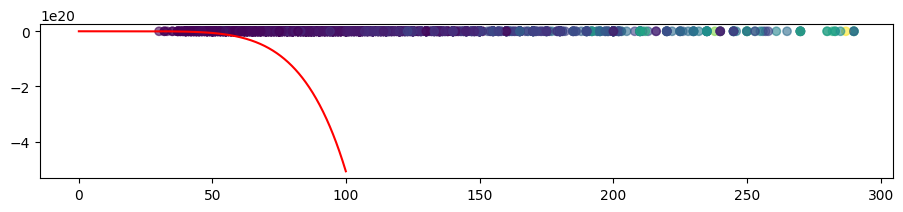

In [33]:
plt.figure(figsize=(11,2))  
scatter = plt.scatter(train['Area'], train['Room'], c=train['Price'], cmap='viridis', alpha=0.6)  
xx=np.arange(0,100,0.1)
yy = clf.intercept_ + \
     clf.coef_[1] * xx + \
     clf.coef_[2] * np.power(xx, 2) + \
     clf.coef_[3] * np.power(xx, 3) + \
     clf.coef_[4] * np.power(xx, 4) + \
     clf.coef_[5] * np.power(xx, 5) + \
     clf.coef_[6] * np.power(xx, 6) + \
     clf.coef_[7] * np.power(xx, 7) + \
     clf.coef_[8] * np.power(xx, 8) + \
     clf.coef_[9] * np.power(xx, 9)
plt.plot(xx,yy,'-r')

In [45]:
from sklearn.metrics import r2_score  

# تبدیل داده های تست به داده های چندجمله ای  
test_x_poly = poly.fit_transform(test_x)  
# پیش بینی مقادیر y  
test_y_ = clf.predict(test_x_poly)  

# محاسبه و چاپ خطاها  
print(f'Mean Absolute Error: {np.mean(np.abs(test_y_ - test_y))}')  
print(f'MSE: {np.mean((test_y_ - test_y) ** 2)}')  
print(f'The r2_score is: {r2_score(test_y, test_y_)}')

Mean Absolute Error: 2071861060.549833
MSE: 1.2648285879133364e+19
The r2_score is: 0.6532759794898558
